## Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

## Import Dataset

Dataset ini terdiri dari berbagai kolom yang mewakili informasi tentang individu atau pelanggan. Berikut adalah penjelasan untuk setiap kolom:

**1. Age**: Kolom ini mencantumkan usia individu atau pelanggan dalam bentuk numerik.

**2. Job:** Menunjukkan jenis pekerjaan dari individu atau pelanggan. Ini adalah kolom kategorikal dengan nilai seperti 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'.

**3. Marital:** Merupakan status perkawinan dari individu atau pelanggan. Ini adalah kolom kategorikal dengan nilai 'divorced', 'married', 'single', 'unknown'. Perlu dicatat bahwa 'divorced' mencakup kedua status cerai dan duda/janda.

**4. Education:** Menunjukkan tingkat pendidikan dari individu atau pelanggan. Ini adalah kolom kategorikal dengan nilai seperti 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'.

**5. Default:** Indikator apakah individu atau pelanggan memiliki kredit bermasalah. Ini adalah kolom kategorikal dengan nilai 'no', 'yes', 'unknown'.

**6. Balance:** Menunjukkan saldo rekening individu atau pelanggan.

**7. Housing:** Indikator apakah individu atau pelanggan memiliki pinjaman perumahan. Ini adalah kolom kategorikal dengan nilai 'no', 'yes', 'unknown'.

**8. Loan:** Indikator apakah individu atau pelanggan memiliki pinjaman pribadi. Ini adalah kolom kategorikal dengan nilai 'no', 'yes', 'unknown'.

**9. Contact:** Jenis komunikasi kontak. Kolom ini kategorikal dengan nilai 'cellular' atau 'telephone'.

**10. Day:** Menunjukkan hari terakhir kontak dalam sebulan. Ini adalah kolom numerik.

**11. Month:** Merupakan bulan terakhir kontak dalam setahun. Ini adalah kolom kategorikal dengan nilai seperti 'jan', 'feb', 'mar', ..., 'nov', 'dec'.

**12. Duration:** Durasi kontak terakhir dalam detik yang merupakan atribut numerik.

**13. Campaign:** Menunjukkan jumlah kontak yang dilakukan selama kampanye ini untuk klien tertentu. Ini adalah atribut numerik. Jumlah ini mencakup kontak terakhir dalam kampanye saat ini.

**14. Pdays:** Menunjukkan jumlah hari yang telah berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya. Ini adalah atribut numerik.

**15. Previous:** Menunjukkan jumlah kontak yang dilakukan sebelum kampanye ini untuk klien tertentu. Ini adalah atribut numerik.

**16. Poutcome:** Menunjukkan hasil dari kampanye pemasaran sebelumnya untuk klien tertentu. Ini adalah atribut kategorikal dengan tiga nilai: unknown, success, other.

**17. y:** Merupakan atribut numerik dalam bentuk biner ('yes' atau 'no') yang menjadi target kelas dalam proyek ini, diasumsikan sebagai informasi apakah klien tertentu telah melakukan investasi dalam bentuk deposito berjangka atau tidak.

In [ ]:
df = pd.read_csv('/content/K04_bank_customers.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


untuk melihat isi dalam kolom kategorikal, digunakan unique() untuk melihat apa saja yang ada di dalam kolom tersebut

In [ ]:
# Mengambil hanya kolom kategorikal
kolom_kategorikal = df.select_dtypes(include=['object']).columns

# Loop untuk melihat nilai unik di setiap kolom
for kolom in kolom_kategorikal:
    unique_values = df[kolom].unique()
    print(f"Nilai unik dalam kolom '{kolom}': {unique_values}")
    print("\n")

Nilai unik dalam kolom 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


Nilai unik dalam kolom 'marital': ['married' 'single' 'divorced']


Nilai unik dalam kolom 'education': ['tertiary' 'secondary' 'unknown' 'primary']


Nilai unik dalam kolom 'default': ['no' 'yes']


Nilai unik dalam kolom 'housing': ['yes' 'no']


Nilai unik dalam kolom 'loan': ['no' 'yes']


Nilai unik dalam kolom 'contact': ['unknown' 'cellular' 'telephone']


Nilai unik dalam kolom 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


Nilai unik dalam kolom 'poutcome': ['unknown' 'failure' 'other' 'success']


Nilai unik dalam kolom 'y': ['no' 'yes']




## Data Preprocessing

info() digunakan untuk mengidentifikasi apakah ada nilai null, tipe data yang perlu dikonversi, dan memberikan perkiraan tentang seberapa besar data dalam hal penggunaan memori.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Terlihat bahwa kolom 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', dan 'y' masih dalam bentuk data kategorikal atau non-numerik, sehingga untuk dapat diolah dengan algoritma machine learning harus diubah ke dalam data numerik.

describe() digunakan untuk memberi gambaran statistik deskriptif tentang distribusi data dalam DataFrame.

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


isna().sum() digunakan untuk mengecek apakah terdapat null value pada dataset, karena jika ada, kemungkinan akan menjadi outlier atau data noise.

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

tidak ada *null value* dapat disimpulkan bahwa dataset sudah bersih.

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


tidak ada data yang terduplikat dalam dataset, dapat disimpulkan dataset sudah bersih.

## Exploratory Data Analysis (EDA)

Tahap ini digunakan untuk menganalisis data dan hubungan fitur, serta menampilkan visualisasinya. EDA juga digunakan untuk menjawab rumusan masalah dalam proyek ini.

1.	Bagaimana pengaruh usia terhadap keputusan pelanggan untuk berlangganan term deposit?
2.	Apakah terdapat perbedaan dalam keputusan berlangganan term deposit antara berbagai jenis pekerjaan pelanggan?
3.	Jenjang pendidikan manakah yang kemungkinan paling banyak berlangganan term deposit?
4.	Apakah terdapat perbedaan dalam keputusan berlangganan term deposit berdasarkan bulan kontak atau jumlah kampanye dilakukan?
5.	Variabel apakah yang sangat mempengaruhi keputusan pelanggan untuk berlangganan term deposit?
6.	Bagaimana analisis tiap variable dalam mempengaruhi prediksi pelanggan dalam berlangganan term deposit?
7.	Apakah Metode KNN efektif melakukan klasifikasi pelanggan dalam dataset yang digunakan?

berdasarkan data yang didapatkan menggunakan describe(), rentang usia pelanggan berada pada 18-95 tahun, untuk melihat persebaran pelanggan dalam berlangganan berdasarkan usia, maka dilakukan pengelompokan usia, kemudian menggunakan metode groupby() untuk pengelompokan.

y             no   yes
age_group             
<20           29    18
21-40      20492  2823
41-60      18217  1848
>61         1184   600


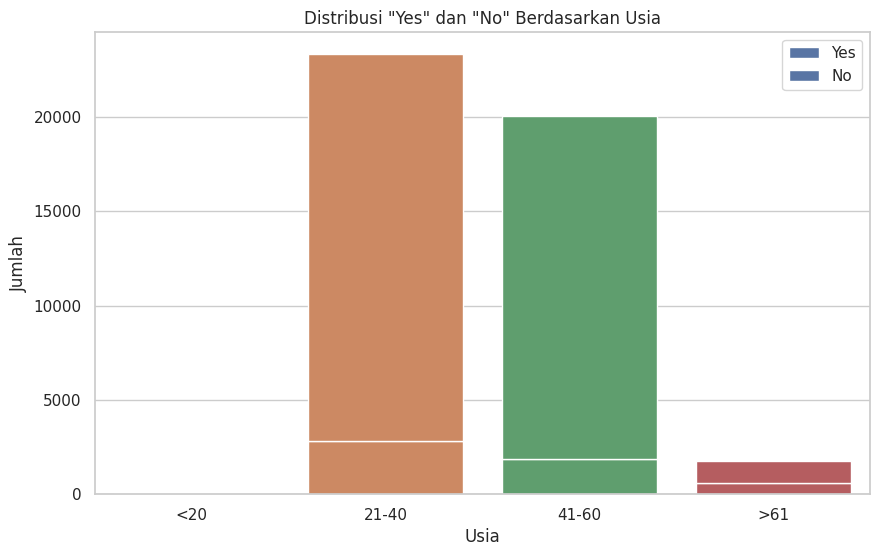

In [ ]:
# Membuat kolom baru untuk kelompok usia
bins = [0, 20, 40, 60, 100]
labels = ['<20', '21-40', '41-60', '>61']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Mengelompokkan berdasarkan kolom baru 'age_group' dan 'y'
grouped_df = df.groupby(['age_group', 'y']).size().unstack()
print(grouped_df)

# Membuat visualisasi menggunakan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y='yes', data=grouped_df, label='Yes')
sns.barplot(x=grouped_df.index, y='no', data=grouped_df, bottom=grouped_df['yes'], label='No')

# Menambahkan label dan judul
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.title('Distribusi "Yes" dan "No" Berdasarkan Usia')
plt.legend()

# Menampilkan plot
plt.show()

berdasarkan metode unique() yang sudah dilakukan di atas, diketahui jenis pekerjaan yang ada pada dataset adalah 'management' 'technician' 'entrepreneur' 'blue-collar' 'unknown' 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student', dengan metode yang sama seperti di atas, dilakukan pengelompokan target berdasarkan jenis pekerjaan dengan metode groupby()

y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


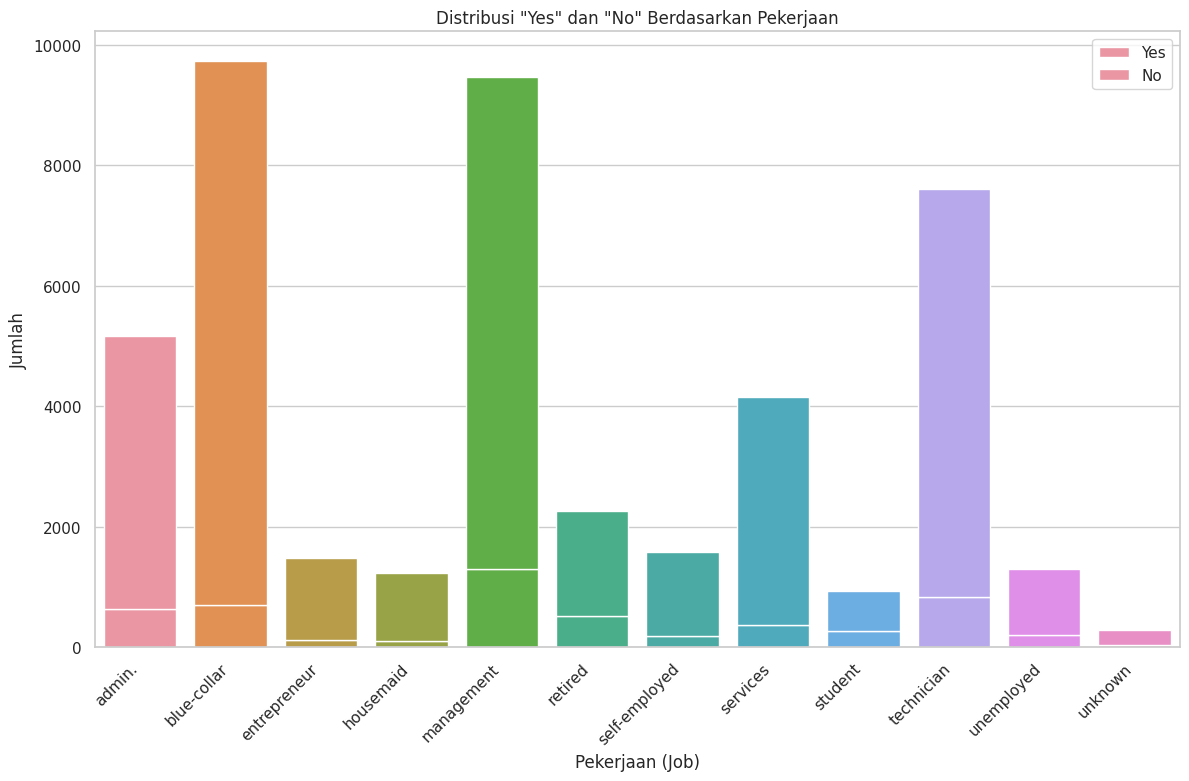

In [ ]:
# Mengelompokkan berdasarkan kolom 'job' dan 'y'
grouped_job_df = df.groupby(['job', 'y']).size().unstack()
print(grouped_job_df)

# Membuat visualisasi menggunakan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x=grouped_job_df.index, y='yes', data=grouped_job_df, label='Yes')
sns.barplot(x=grouped_job_df.index, y='no', data=grouped_job_df, bottom=grouped_job_df['yes'], label='No')

# Menambahkan label dan judul
plt.xlabel('Pekerjaan (Job)')
plt.ylabel('Jumlah')
plt.title('Distribusi "Yes" dan "No" Berdasarkan Pekerjaan')
plt.xticks(rotation=45, ha="right")  # Memutar label x agar lebih mudah dibaca
plt.legend()

# Menampilkan plot
plt.show()

berdasarkan metode unique() yang sudah dilakukan di atas, diketahui jenis pendidikan yang ada pada dataset adalah 'tertiary' 'secondary' 'unknown' 'primary', dengan metode yang sama seperti di atas, dilakukan pengelompokan target berdasarkan jenis pendidikan dengan metode groupby()

y             no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252


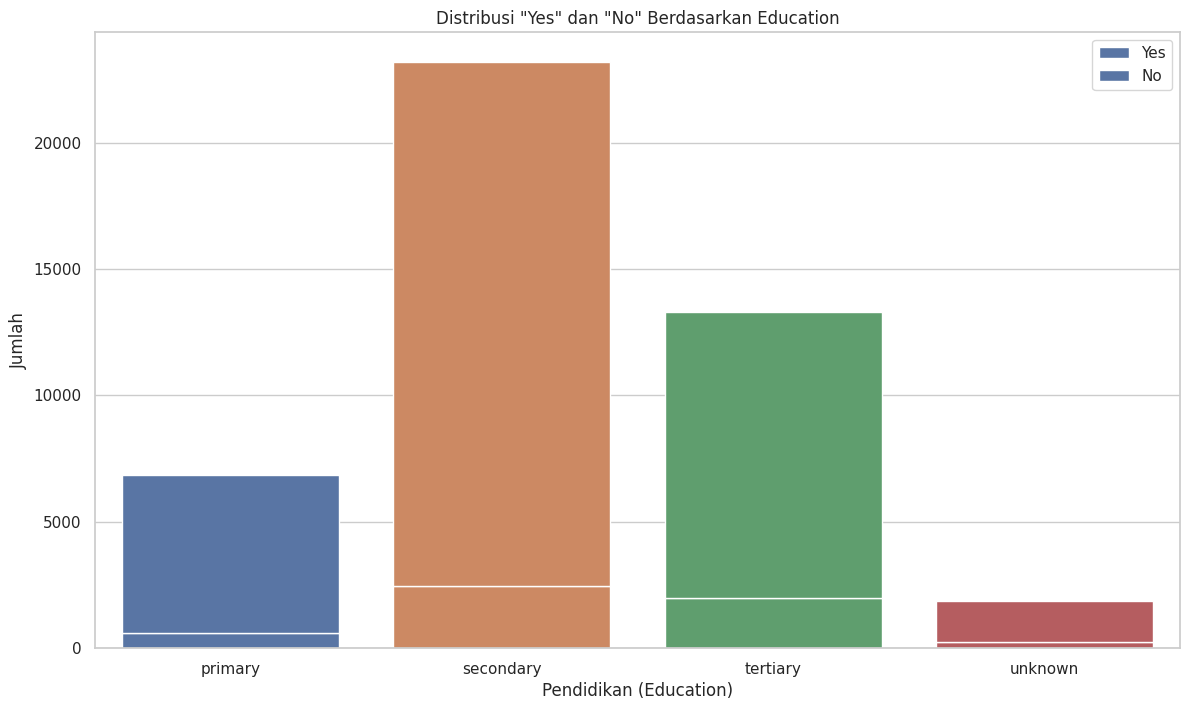

In [ ]:
# Mengelompokkan berdasarkan kolom 'education' dan 'y'
grouped_edu_df = df.groupby(['education', 'y']).size().unstack()
print(grouped_edu_df)

# Membuat visualisasi menggunakan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x=grouped_edu_df.index, y='yes', data=grouped_edu_df, label='Yes')
sns.barplot(x=grouped_edu_df.index, y='no', data=grouped_edu_df, bottom=grouped_edu_df['yes'], label='No')

# Menambahkan label dan judul
plt.xlabel('Pendidikan (Education)')
plt.ylabel('Jumlah')
plt.title('Distribusi "Yes" dan "No" Berdasarkan Education')
plt.legend()

# Menampilkan plot
plt.show()

berdasarkan metode unique() yang sudah dilakukan di atas, diketahui bulan yang ada pada dataset adalah 'may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep', dengan metode yang sama seperti di atas, dilakukan pengelompokan target berdasarkan bulan terakhir kontak dengan metode groupby()

y         no  yes
month            
apr     2355  577
aug     5559  688
dec      114  100
feb     2208  441
jan     1261  142
jul     6268  627
jun     4795  546
mar      229  248
may    12841  925
nov     3567  403
oct      415  323
sep      310  269


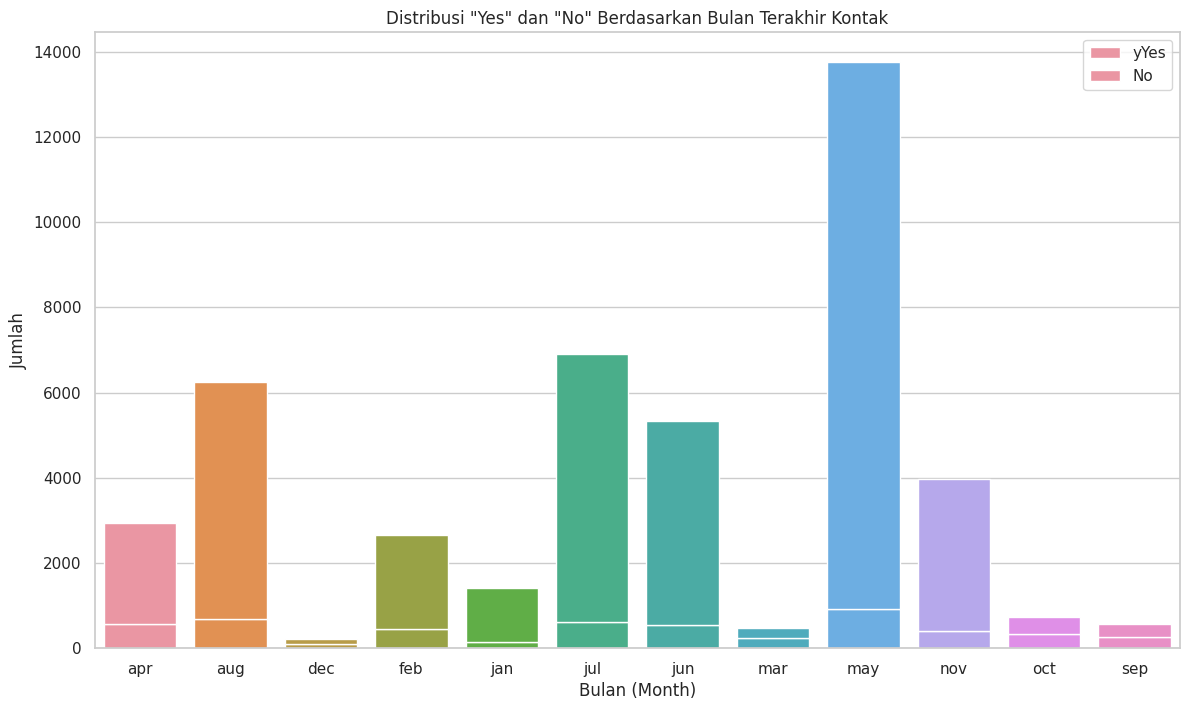

In [ ]:
# Mengelompokkan berdasarkan kolom 'month' dan 'y'
grouped_month_df = df.groupby(['month', 'y']).size().unstack()
print(grouped_month_df)

# Membuat visualisasi menggunakan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x=grouped_month_df.index, y='yes', data=grouped_month_df, label='yYes')
sns.barplot(x=grouped_month_df.index, y='no', data=grouped_month_df, bottom=grouped_month_df['yes'], label='No')

# Menambahkan label dan judul
plt.xlabel('Bulan (Month)')
plt.ylabel('Jumlah')
plt.title('Distribusi "Yes" dan "No" Berdasarkan Bulan Terakhir Kontak')
plt.legend()

# Menampilkan plot
plt.show()

dengan metode yang sama seperti di atas, dilakukan pengelompokan target berdasarkan jumlah kampanye dengan metode groupby()

y              no     yes
campaign                 
1         14983.0  2561.0
2         11104.0  1401.0
3          4903.0   618.0
4          3205.0   317.0
5          1625.0   139.0
6          1199.0    92.0
7           688.0    47.0
8           508.0    32.0
9           306.0    21.0
10          252.0    14.0
11          185.0    16.0
12          151.0     4.0
13          127.0     6.0
14           89.0     4.0
15           80.0     4.0
16           77.0     2.0
17           63.0     6.0
18           51.0     NaN
19           44.0     NaN
20           42.0     1.0
21           34.0     1.0
22           23.0     NaN
23           22.0     NaN
24           19.0     1.0
25           22.0     NaN
26           13.0     NaN
27           10.0     NaN
28           16.0     NaN
29           15.0     1.0
30            8.0     NaN
31           12.0     NaN
32            8.0     1.0
33            6.0     NaN
34            5.0     NaN
35            4.0     NaN
36            4.0     NaN
37          

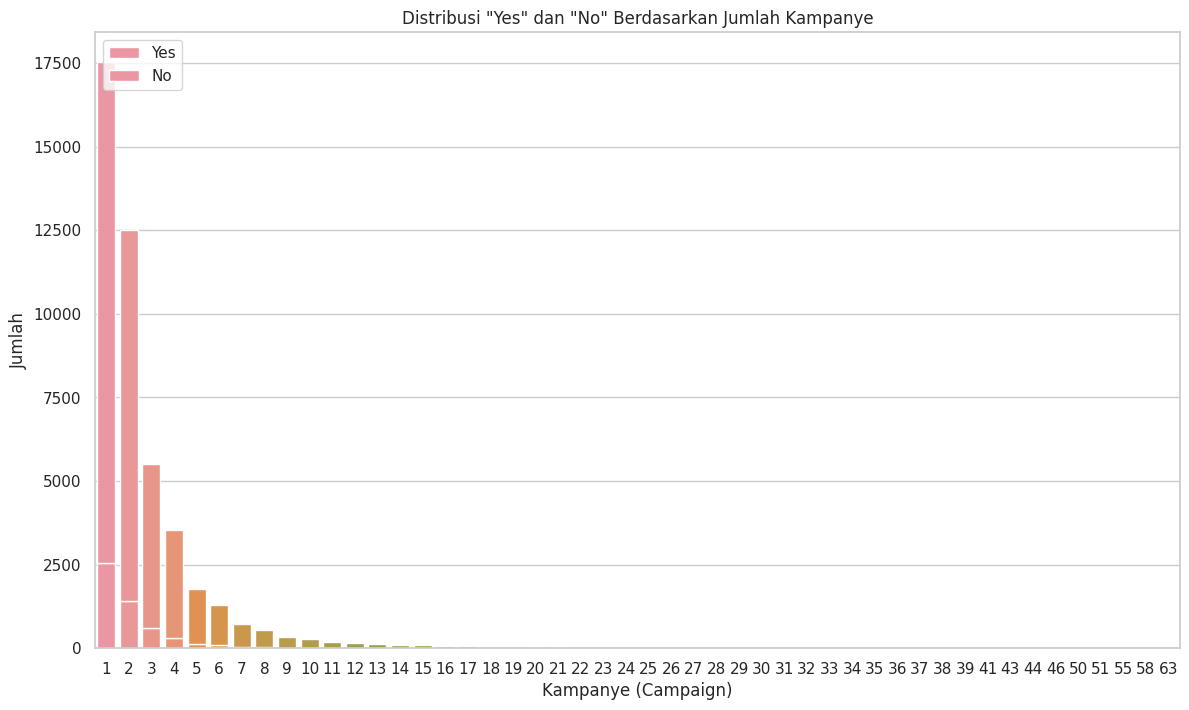

In [ ]:
# Mengelompokkan berdasarkan kolom 'campaign' dan 'y'
grouped_campaign_df = df.groupby(['campaign', 'y']).size().unstack()
print(grouped_campaign_df)

# Membuat visualisasi menggunakan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x=grouped_campaign_df.index, y='yes', data=grouped_campaign_df, label='Yes')
sns.barplot(x=grouped_campaign_df.index, y='no', data=grouped_campaign_df, bottom=grouped_campaign_df['yes'], label='No')

# Menambahkan label dan judul
plt.xlabel('Kampanye (Campaign)')
plt.ylabel('Jumlah')
plt.title('Distribusi "Yes" dan "No" Berdasarkan Jumlah Kampanye')
plt.legend()

# Menampilkan plot
plt.show()

untuk melihat distribusi persebaran kelas/target digunakan visualisasi berikut

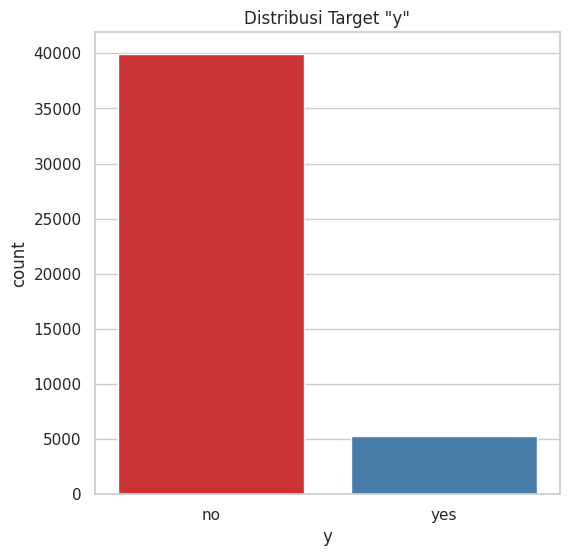

In [ ]:
# Membuat visualisasi menggunakan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.countplot(x='y', data=df, palette='Set1')
plt.title('Distribusi Target "y"')
plt.show()

terlihat jika kelas 'no' lebih mendominasi dengan total sekitar 40000 data, sedangkan kelas 'yes' merupakan minoritas dengan total sekitar 5000 data

## Feature Engineering

Tahap ini digunakan untuk mentransformasikan data kategorikal menjadi data numerik, dan menghitung korelasi fitur dengan target. Pada dataset, kolom 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', dan 'y' akan diubah menjadi data numerik menggunakan metode label encoding.

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom 'job' menjadi data numerik
df['job'] = label_encoder.fit_transform(df['job'])

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom 'marital' menjadi data numerik
df['marital'] = label_encoder.fit_transform(df['marital'])

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom 'education' menjadi data numerik
df['education'] = label_encoder.fit_transform(df['education'])

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom 'default' menjadi data numerik
df['default'] = label_encoder.fit_transform(df['default'])

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom 'housing' menjadi data numerik
df['housing'] = label_encoder.fit_transform(df['housing'])

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom 'loan' menjadi data numerik
df['loan'] = label_encoder.fit_transform(df['loan'])

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom 'contact' menjadi data numerik
df['contact'] = label_encoder.fit_transform(df['contact'])

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom 'month' menjadi data numerik
df['month'] = label_encoder.fit_transform(df['month'])

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom 'poutcome' menjadi data numerik
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

# Menggunakan LabelEncoder untuk mengubah nilai dalam kolom 'y' menjadi data numerik
df['y'] = label_encoder.fit_transform(df['y'])

In [ ]:
# cek dataset apakah sudah terubah menjadi data numerik semua
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,41-60
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,41-60
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,21-40
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,41-60
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,21-40


In [ ]:
# drop kolom yang tidak diperlukan, kolom age_group adalah kolom tambahan yang dibuat sebelumnya untuk memudahkan pengelompokan
df = df.drop(columns='age_group')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


Pengukuran korelasi fitur dengan target dilakukan dengan metode corr() atau korelasi Pearson untuk mengukur sejauh mana fitur berkorelasi dengan target.

Korelasi Pearson memberikan ukuran kekuatan dan arah hubungan linear antara dua variabel numerik. Proses ini dapat memberikan wawasan tentang bagaimana fitur-fitur berinteraksi satu sama lain dalam konteks deteksi mood musikal. Proses ini juga dapat mengurangi dimensi data yang mungkin dapat menyebabkan overfitting.

Korelasi ini dapat berkisar antara -1 hingga 1, di mana 1 menunjukkan korelasi positif sempurna, -1 menunjukkan korelasi negatif sempurna, dan 0 menunjukkan tidak adanya korelasi linear.

In [ ]:
data_corr = df.corr(method='pearson')
data_corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


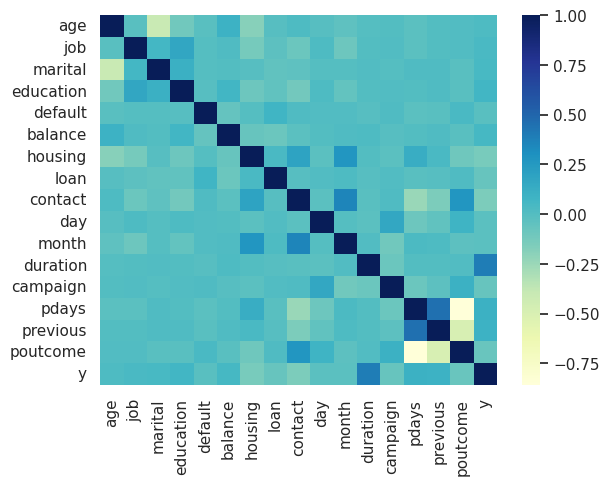

In [ ]:
# plot heatmap untuk visualisasi korelasi
dataplot = sns.heatmap(data_corr, cmap="YlGnBu", annot=False)
plt.show()

In [ ]:
# Mengakses kolom atau baris korelasi dengan target
target_corr = data_corr['y']

# Mengurutkan korelasi secara descending
sorted_corr = target_corr.abs().sort_values(ascending=False)

# Tampilkan hasil pengurutan
print(sorted_corr)

y            1.000000
duration     0.394521
contact      0.148395
housing      0.139173
pdays        0.103621
previous     0.093236
poutcome     0.077840
campaign     0.073172
loan         0.068185
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
day          0.028348
age          0.025155
month        0.024471
default      0.022419
Name: y, dtype: float64


- Duration: Korelasi positif yang signifikan (0.394521) menunjukkan bahwa durasi kontak terakhir memiliki pengaruh positif pada keputusan target ('y'). Ini bisa berarti bahwa semakin lama durasi kontak, semakin tinggi kemungkinan seseorang berlangganan.

- Contact: Korelasi positif (0.148395) menunjukkan bahwa jenis kontak juga memiliki pengaruh positif pada keputusan target. Mungkin jenis kontak tertentu lebih efektif dalam mendapatkan langganan.

- Housing, Pdays, Previous, Poutcome, Campaign: Semua memiliki korelasi positif, meskipun mungkin tidak sekuat durasi atau jenis kontak. Ini menunjukkan bahwa variabel-variabel ini memiliki pengaruh positif pada target.

- Loan, Education, Balance, Marital, Job, Day, Age, Month, Default: Korelasi yang relatif rendah, namun masih dapat memberikan informasi tambahan. Variabel seperti pendidikan, saldo, status perkawinan, dan pekerjaan mungkin memiliki dampak yang lebih rendah pada keputusan target.

## Klasifikasi dengan KNN

Fitur dan target perlu dipisahkan sebelum masuk ke algoritma machine learning. Fitur (X) dipilih mulai dari kolom pertama hingga 16, sedangkan target (y) berada di kolom 17. Data training dan testing dibagi menjadi 80:20 menggunakan fungsi train_test_split.

In [ ]:
# pisahkan fitur dengan target
X = df.iloc[:, 0:16]
y = df.iloc[:, 16]

# bagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Metode KNN memiliki parameter jarak atau disebut K yang pada python diinisialisais sebagai n_neighbors. Parameter ini mempengaruhi akurasi, sehingga akan diujikan 4 parameter K yaitu 3, 5, 7, dan 9 menggunakan GridSearchCV.

Metrik evaluasi yang digunakan yaitu akurasi, presisi, recall, dan F1 score

In [ ]:
# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Definisikan parameter grid yang ingin diuji
param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}

# Inisialisasi GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid,
                                scoring='accuracy', verbose=1, n_jobs=-1, cv=5)

# Lakukan pencarian parameter terbaik
grid_search_knn.fit(X_train, y_train)

# Inisialisasi list untuk menyimpan hasil evaluasi
accuracy_list_knn = []
precision_list_knn = []
recall_list_knn = []
f1_list_knn = []

# Loop melalui hasil GridSearchCV
for i in range(len(grid_search_knn.cv_results_['params'])):
    params_knn = grid_search_knn.cv_results_['params'][i]
    model_knn = KNeighborsClassifier(**params_knn)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)

    # Hitung metrik evaluasi
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
    recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
    f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

    # Simpan metrik evaluasi ke dalam list
    accuracy_list_knn.append(accuracy_knn)
    precision_list_knn.append(precision_knn)
    recall_list_knn.append(recall_knn)
    f1_list_knn.append(f1_knn)

# Buat DataFrame untuk menyimpan hasil evaluasi
results_df_knn = pd.DataFrame({
    'Parameter Set': [str(params_knn) for params_knn in grid_search_knn.cv_results_['params']],
    'Accuracy': accuracy_list_knn,
    'Precision': precision_list_knn,
    'Recall': recall_list_knn,
    'F1 Score': f1_list_knn
})

# Tampilkan DataFrame
results_df_knn

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,Parameter Set,Accuracy,Precision,Recall,F1 Score
0,{'n_neighbors': 3},0.872056,0.854896,0.872056,0.861712
1,{'n_neighbors': 5},0.876921,0.853357,0.876921,0.860995
2,{'n_neighbors': 7},0.879575,0.855503,0.879575,0.862573
3,{'n_neighbors': 9},0.882561,0.857291,0.882561,0.863268


Seperti yang dilihat pada hasil korelasi Pearson, hanya terdapat 4 kolom atau fitur dengan nilai korelasi di atas 0.1, sehingga pada proyek ini fitur atau kolom dengan nilai korelasi di bawah 0.1 dianggap tidak berkorelasi dan tidak digunakan dalam pelatihan dan pengujian model.

In [ ]:
# drop fitur/kolom yang memiliki korelasi rendah
column_low_corr = ['previous', 'poutcome', 'campaign', 'loan', 'education', 'balance', 'marital', 'job', 'day', 'age', 'month', 'default']
df_after_corr = df.drop(columns=column_low_corr)
df_after_corr.head()

,housing,contact,duration,pdays,y
0,1,2,261,-1,0
1,1,2,151,-1,0
2,1,2,76,-1,0
3,1,2,92,-1,0
4,0,2,198,-1,0


In [ ]:
# pisahkan fitur dengan target
X_corr = df_after_corr.iloc[:, 0:4]
y_corr = df_after_corr.iloc[:, 4]

# bagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_corr, y_corr, test_size=0.2, random_state=0)

In [ ]:
# Inisialisasi model KNN
knn_model_corr = KNeighborsClassifier()

# Definisikan parameter grid yang ingin diuji
param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}

# Inisialisasi GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model_corr, param_grid=param_grid,
                                scoring='accuracy', verbose=1, n_jobs=-1, cv=5)

# Lakukan pencarian parameter terbaik
grid_search_knn.fit(X_train, y_train)

# Inisialisasi list untuk menyimpan hasil evaluasi
accuracy_list_knn = []
precision_list_knn = []
recall_list_knn = []
f1_list_knn = []

# Loop melalui hasil GridSearchCV
for i in range(len(grid_search_knn.cv_results_['params'])):
    params_knn = grid_search_knn.cv_results_['params'][i]
    model_knn = KNeighborsClassifier(**params_knn)
    model_knn.fit(X_train, y_train)
    y_pred_knn = model_knn.predict(X_test)

    # Hitung metrik evaluasi
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
    recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
    f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

    # Simpan metrik evaluasi ke dalam list
    accuracy_list_knn.append(accuracy_knn)
    precision_list_knn.append(precision_knn)
    recall_list_knn.append(recall_knn)
    f1_list_knn.append(f1_knn)

# Buat DataFrame untuk menyimpan hasil evaluasi
results_df_knn_corr = pd.DataFrame({
    'Parameter Set': [str(params_knn) for params_knn in grid_search_knn.cv_results_['params']],
    'Accuracy': accuracy_list_knn,
    'Precision': precision_list_knn,
    'Recall': recall_list_knn,
    'F1 Score': f1_list_knn
})

# Tampilkan DataFrame
results_df_knn_corr

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,Parameter Set,Accuracy,Precision,Recall,F1 Score
0,{'n_neighbors': 3},0.873493,0.864551,0.873493,0.868537
1,{'n_neighbors': 5},0.884330,0.870466,0.884330,0.875627
2,{'n_neighbors': 7},0.886100,0.871335,0.886100,0.876515
3,{'n_neighbors': 9},0.886984,0.871696,0.886984,0.876852


Prediksi pada 10 data pengujian dengan model terbaik (n_neighbros = 9)

In [ ]:
# Ambil 10 data tes dari X_test
X_test_subset = X_test.head(10)

# Buat model KNN dengan parameter terbaik
best_knn_model = KNeighborsClassifier(n_neighbors=9)

# Latih model dengan data pelatihan
best_knn_model.fit(X_train, y_train)

# Lakukan prediksi pada data tes
y_pred_head = best_knn_model.predict(X_test_subset)

# Buat DataFrame untuk menampilkan hasil prediksi
result_df = pd.DataFrame({
    'Fitur': X_test_subset.values.tolist(),
    'Target Aktual': y_test.head(10).values,
    'Prediksi Target': y_pred_head
})

# Tampilkan DataFrame
result_df

,Fitur,Target Aktual,Prediksi Target
0,"[1, 0, 91, -1]",0,0
1,"[1, 0, 1073, -1]",1,1
2,"[0, 1, 243, -1]",0,0
3,"[1, 0, 105, 188]",0,0
4,"[1, 0, 332, -1]",0,0
5,"[1, 0, 129, -1]",0,0
6,"[1, 0, 202, -1]",0,0
7,"[1, 0, 68, 363]",0,0
8,"[0, 0, 136, -1]",0,0
9,"[0, 1, 41, -1]",0,0


Melakukan visualisasi akurasi model untuk melihat berapa banyak data tiap kelas yang terprediksi dengan benar.

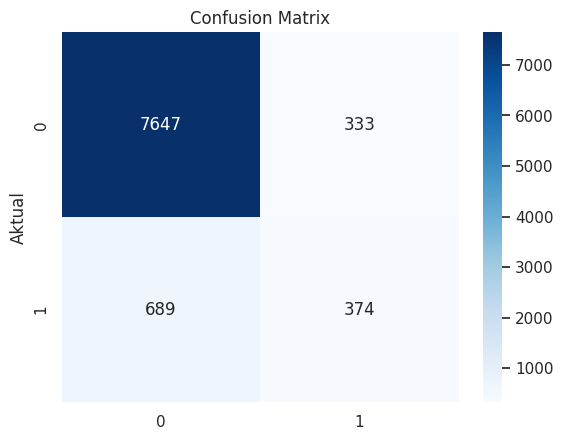

In [ ]:
# Buat model KNN dengan parameter terbaik
best_knn_model = KNeighborsClassifier(n_neighbors=9)

# Latih model dengan data pelatihan
best_knn_model.fit(X_train, y_train)

# Lakukan prediksi pada data tes
y_pred = best_knn_model.predict(X_test)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dalam bentuk heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()